In [1]:
import matplotlib.pyplot as plt
from pathlib import Path

In [2]:
def get_seconds(contents, accuracy=3):
    time_lines = [i.rstrip('s') for i in contents.split()[2::5]]
    time = map(float, time_lines)
    return list(map(lambda x: round(x, accuracy),time))

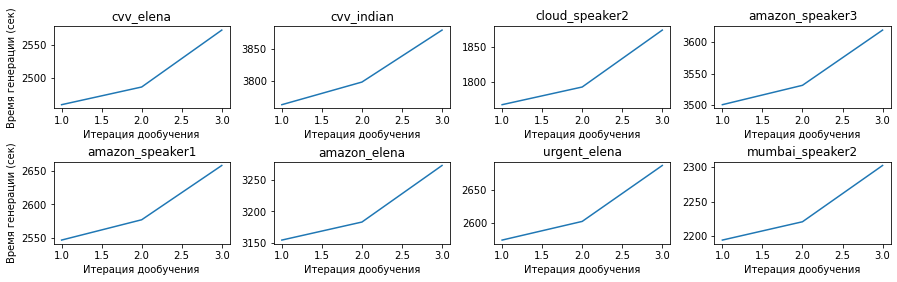

In [10]:
figure, axis = plt.subplots(2, 4)
figure.set_figwidth(15)
plt.subplots_adjust(wspace=.25, hspace=.65)
for n, file in enumerate(Path('timing').iterdir()):
    time = get_seconds(file.read_text())
    if not file.name.startswith('amazon_speaker3'):
        time = time[::5]
    x = list(range(len(time), 0, -1))
    j = n % 4
    i = n // 4

    axis[i, j].plot(x, time)
    axis[i, j].set_title(file.name)
    axis[i, j].set_xlabel('Итерация дообучения')
    if j == 0:
        axis[i, j].set_ylabel('Время генерации (сек)')
plt.show()
figure.savefig('efficiency.png', dpi=figure.dpi)